In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/MyDrive/Osteoporosis/N'
aug_dir = '/content/drive/My Drive/Os/Normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/MyDrive/Osteoporosis/O'
aug_dir = '/content/drive/My Drive/Os/Osteo'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import os
import pandas as pd

healthy_dirs = [
    r'/content/drive/My Drive/Os/Normal'
]


osteoporosis_dirs = [
    r'/content/drive/My Drive/Os/Osteo'
]
filepaths = []
labels = []
dict_lists = [healthy_dirs, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteoporosis']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)
print(knee_osteoporosis_df.head())
print(knee_osteoporosis_df["labels"].value_counts())

                                           filepaths   labels
0  /content/drive/My Drive/Os/Normal/Normal_101_a...  Healthy
1  /content/drive/My Drive/Os/Normal/Normal_101_a...  Healthy
2  /content/drive/My Drive/Os/Normal/Normal_101_a...  Healthy
3  /content/drive/My Drive/Os/Normal/Normal_101_a...  Healthy
4  /content/drive/My Drive/Os/Normal/Normal_101_a...  Healthy
labels
Healthy         1860
Osteoporosis    1860
Name: count, dtype: int64


In [ ]:
knee_osteoporosis_df.shape

(3720, 2)

***Preprocessing***

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# Step 1: Check if images exist in the directory
def check_images(directory):
    if not os.path.exists(directory):
        print(f"Error: Directory {directory} does not exist!")
        return []
    return [os.path.join(root, f) for root, _, files in os.walk(directory) for f in files if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
# Step 2: Preprocessing - Load and preprocess images
def preprocess_images(directory, target_size=(224, 224)):
    images = []
    labels = []
    image_files = check_images(directory)
    if not image_files:
        print("Error: No valid images found in the directory.")
        return np.array([]), np.array([])

    for img_path in image_files:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Failed to load {img_path}")
            continue
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        images.append(img)
        label = 0 if 'Normal' in img_path else 1  # Assign label based on folder name
        labels.append(label)

    return np.array(images), np.array(labels)

***Normalization***

In [ ]:
# Step 3: Normalization - Scale pixel values to [0,1]
def normalize_images(images):
    return images.astype('float32') / 255.0

***Rescaling & Augmentation***

In [ ]:
# Step 4: Rescaling & Augmentation
image_gen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescaling
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

***Feature Extraction using ResNet50***

In [ ]:
# Step 5: Feature Extraction using ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

feature_extractor = Sequential([
    base_model,
    GlobalAveragePooling2D()
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


***Process and extract features from augmented dataset***

In [ ]:
# Step 6: Process and extract features from augmented dataset
aug_dir = '/content/drive/MyDrive/Os'  # Directory containing 'Normal' and 'Osteo' subdirectories
X_train, y_train = preprocess_images(aug_dir)

if X_train.size == 0:
    print("No images were processed. Please check the dataset path and format.")
else:
    X_train = normalize_images(X_train)
    X_train_features = feature_extractor.predict(X_train)
    print("Feature extraction completed successfully!")

107/107 ━━━━━━━━━━━━━━━━━━━━ 643s 6s/step
Feature extraction completed successfully!


In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Step 1: Create DataFrame from Augmented Dataset
def create_dataframe(directory):
    filepaths = []
    labels = []
    for category in ["Normal", "Osteo"]:
        category_path = os.path.join(directory, category)
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} does not exist!")
            continue
        for filename in os.listdir(category_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                filepaths.append(os.path.join(category_path, filename))
                labels.append(category)

    df = pd.DataFrame({"filepaths": filepaths, "labels": labels})
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the dataset directory
aug_dir = "/content/drive/My Drive/Os"
knee_osteoporosis_df = create_dataframe(aug_dir)

In [ ]:
# Step 2: Split the dataset
train_images, test_images = train_test_split(knee_osteoporosis_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(train_images, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(1909, 2)
(1023, 2)
(478, 2)
(2387, 2)


In [ ]:
# Step 3: Image Augmentation and Data Preparation
image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train = image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(224, 224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=4,
    shuffle=False
)

test = image_gen.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=(224, 224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=4,
    shuffle=False
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(224, 224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=4,
    shuffle=False
)

classes = list(train.class_indices.keys())
print(classes)

Found 1909 validated image filenames belonging to 2 classes.
Found 1023 validated image filenames belonging to 2 classes.
Found 478 validated image filenames belonging to 2 classes.
['Normal', 'Osteo']


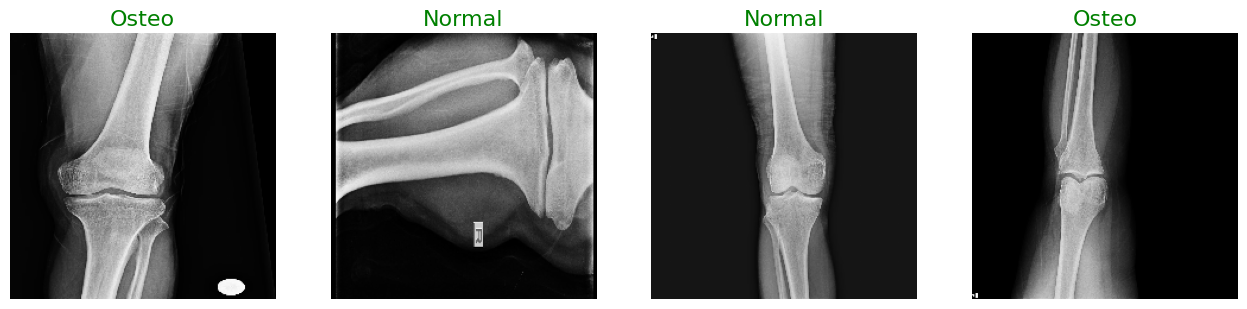

Data preprocessing and visualization completed successfully!


In [ ]:
# Step 4: Function to Display Sample Images
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels = next(image_gen)
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2  # Scale images between 0 and 1
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
    plt.show()

# Step 5: Display Sample Images
show_knee_images(train)

print("Data preprocessing and visualization completed successfully!")

**Train Models**

**MobileNet Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a MobileNetV2-based model
def create_mobilenet_model(input_shape, num_classes):
    # Load the MobileNetV2 model without the top layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers to retain pre-trained features
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Flatten feature maps
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (224, 224, 3)  # Image dimensions (height, width, channels)
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
mobilenet_model = create_mobilenet_model(input_shape, num_classes)

# Display the model architecture
mobilenet_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = mobilenet_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks like annealer if needed
)

# Save the model in .h5 format after training
mobilenet_model.save('mobilenet_model.h5')
print("Model saved as 'mobilenet_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = mobilenet_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 131s 261ms/step - accuracy: 0.6399 - loss: 0.7433 - val_accuracy: 0.7992 - val_loss: 0.4766
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - accuracy: 0.7319 - loss: 0.5293 - val_accuracy: 0.7950 - val_loss: 0.4610
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 118s 248ms/step - accuracy: 0.7817 - loss: 0.4794 - val_accuracy: 0.7720 - val_loss: 0.4448
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 131s 275ms/step - accuracy: 0.7932 - loss: 0.4534 - val_accuracy: 0.8054 - val_loss: 0.4225
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 122s 254ms/step - accuracy: 0.8029 - loss: 0.4324 - val_accuracy: 0.8138 - val_loss: 0.4206
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 145s 262ms/step - accuracy: 0.7840 - loss: 0.4303 - val_accuracy: 0.8013 - val_loss: 0.4065
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 140s 292ms/step - accuracy: 0.8003 - loss: 0.4350 - val_accuracy: 0.8013 - val_loss: 0.4150
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 127s 262ms/step - accuracy: 0.8084 -

Model saved as 'mobilenet_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 59s 229ms/step - accuracy: 0.8122 - loss: 0.3836
Test Accuracy: 83.09%


256/256 ━━━━━━━━━━━━━━━━━━━━ 58s 218ms/step


<Figure size 1000x1000 with 0 Axes>

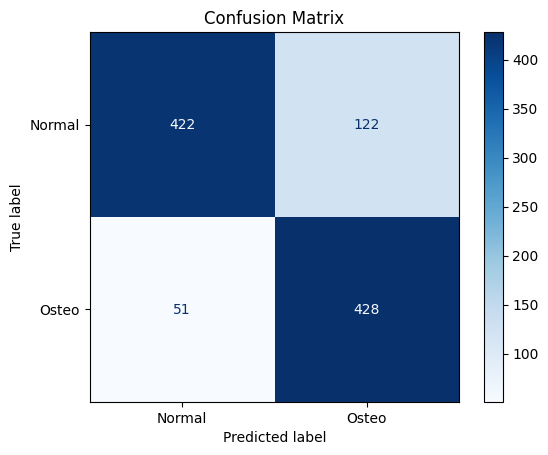

Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.78      0.83       544
       Osteo       0.78      0.89      0.83       479

    accuracy                           0.83      1023
   macro avg       0.84      0.83      0.83      1023
weighted avg       0.84      0.83      0.83      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = mobilenet_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

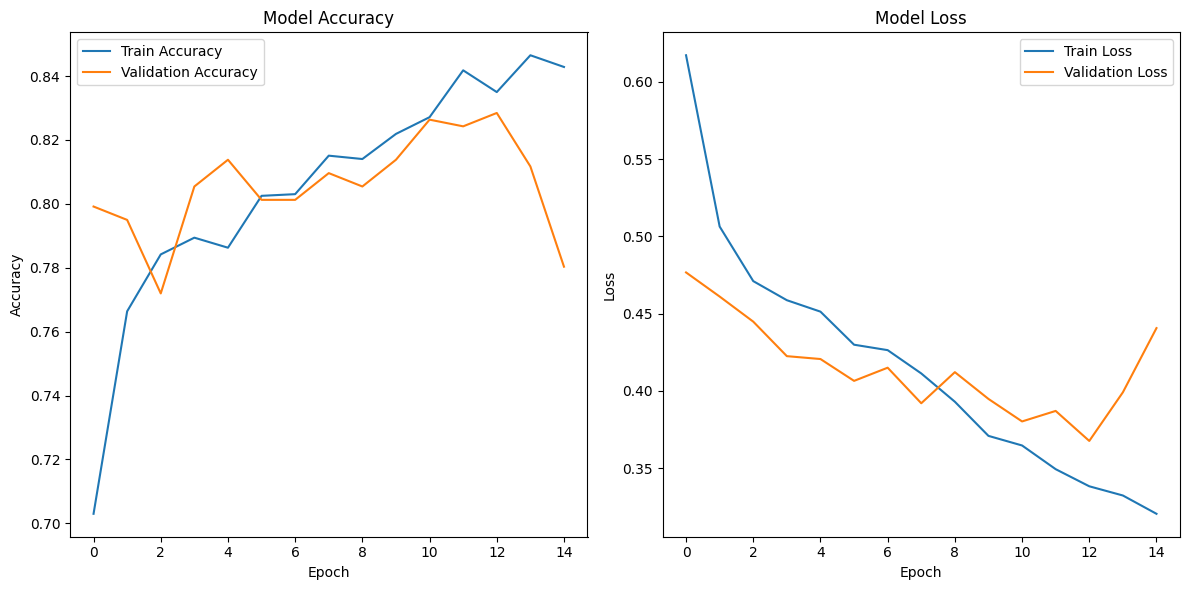

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = mobilenet_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 52s 201ms/step
Micro-Averaged ROC-AUC Score: 0.8346317389168612


**CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a CNN model
def create_cnn(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (224, 224, 3)  # Image dimensions
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
cnn_model = create_cnn(input_shape, num_classes)

# Display the model architecture
cnn_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks like annealer if needed
)

# Save the model in .h5 format after training
cnn_model.save('cnn_model.h5')
print("Model saved as 'cnn_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.6632 - loss: 1.4402 - val_accuracy: 0.7364 - val_loss: 0.5289
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - accuracy: 0.8082 - loss: 0.4293 - val_accuracy: 0.7762 - val_loss: 0.4628
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 474s 990ms/step - accuracy: 0.8584 - loss: 0.3320 - val_accuracy: 0.7845 - val_loss: 0.4410
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.9056 - loss: 0.2386 - val_accuracy: 0.8096 - val_loss: 0.4849
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step - accuracy: 0.9306 - loss: 0.1672 - val_accuracy: 0.8326 - val_loss: 0.4256
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.9439 - loss: 0.1397 - val_accuracy: 0.8431 - val_loss: 0.5663
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.9671 - loss: 0.1017 - val_accuracy: 0.8368 - val_loss: 0.6021
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 478s 999ms/step - accuracy: 0.9698 - loss: 0.0868 - va

Model saved as 'cnn_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 44s 170ms/step - accuracy: 0.8170 - loss: 0.4164
Test Accuracy: 82.89%


256/256 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step


<Figure size 1000x1000 with 0 Axes>

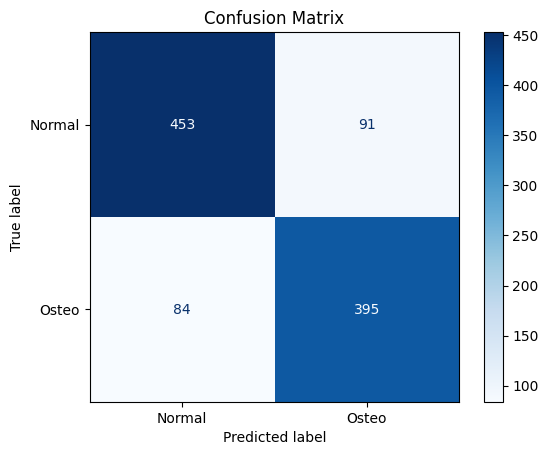

Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.83      0.84       544
       Osteo       0.81      0.82      0.82       479

    accuracy                           0.83      1023
   macro avg       0.83      0.83      0.83      1023
weighted avg       0.83      0.83      0.83      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = cnn_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

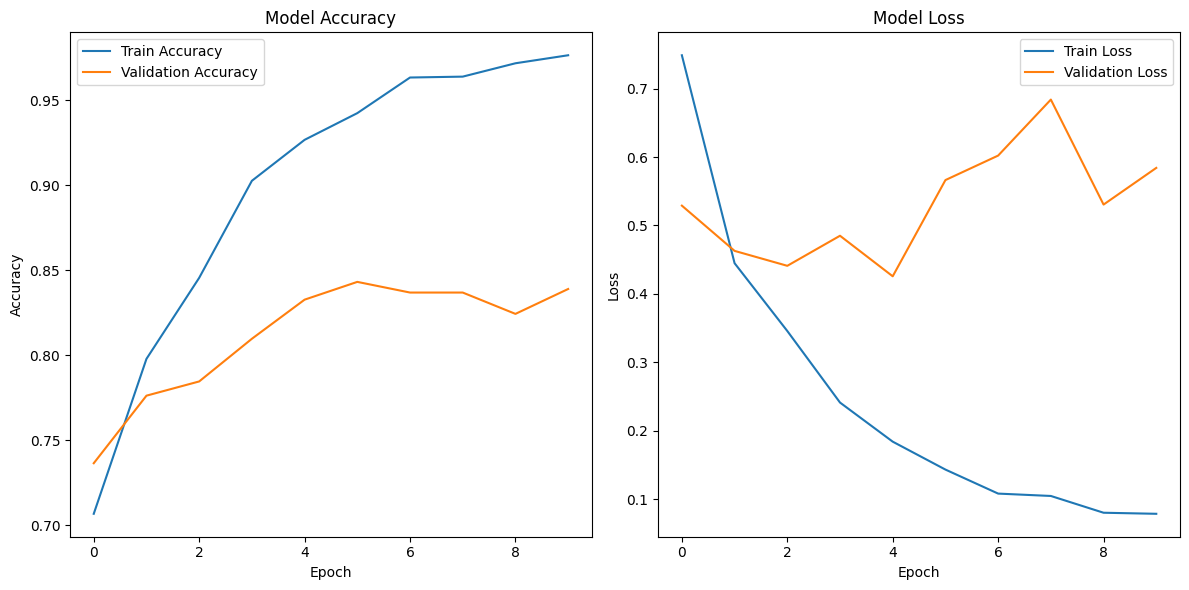

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = cnn_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step
Micro-Averaged ROC-AUC Score: 0.8286776218838267


**ResNet Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a ResNet50-based model
def create_resnet_model(input_shape, num_classes):
    # Load the ResNet50 model without the top layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers to retain pre-trained features
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Flatten feature maps
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (224, 224, 3)  # Image dimensions (height, width, channels)
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
resnet_model = create_resnet_model(input_shape, num_classes)

# Display the model architecture
resnet_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = resnet_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks like annealer if needed
)

# Save the model in .h5 format after training
resnet_model.save('resnet_model.h5')
print("Model saved as 'resnet_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 568s 1s/step - accuracy: 0.5452 - loss: 0.8384 - val_accuracy: 0.7615 - val_loss: 0.5734
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 442s 926ms/step - accuracy: 0.6577 - loss: 0.6275 - val_accuracy: 0.5858 - val_loss: 0.6021
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 436s 912ms/step - accuracy: 0.6797 - loss: 0.6215 - val_accuracy: 0.7720 - val_loss: 0.5749
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 424s 888ms/step - accuracy: 0.6787 - loss: 0.6175 - val_accuracy: 0.7720 - val_loss: 0.5437
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 446s 895ms/step - accuracy: 0.7018 - loss: 0.5895 - val_accuracy: 0.7573 - val_loss: 0.5446
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 491s 1s/step - accuracy: 0.7322 - loss: 0.5695 - val_accuracy: 0.7636 - val_loss: 0.5241
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 436s 913ms/step - accuracy: 0.7103 - loss: 0.5734 - val_accuracy: 0.7448 - val_loss: 0.5364
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 443s 927ms/step - accuracy: 0.7480 - loss:

Model saved as 'resnet_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 207s 810ms/step - accuracy: 0.7373 - loss: 0.5160
Test Accuracy: 75.37%


256/256 ━━━━━━━━━━━━━━━━━━━━ 202s 773ms/step


<Figure size 1000x1000 with 0 Axes>

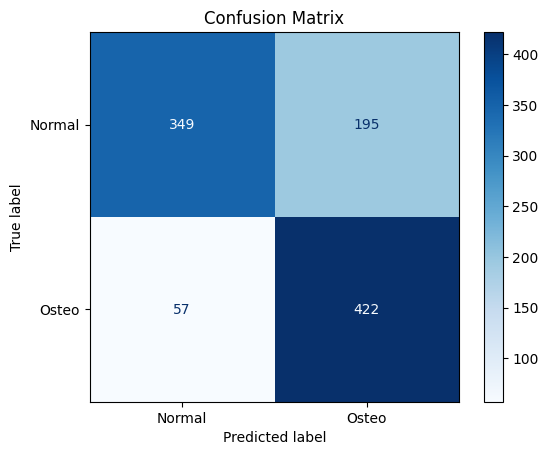

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.64      0.73       544
       Osteo       0.68      0.88      0.77       479

    accuracy                           0.75      1023
   macro avg       0.77      0.76      0.75      1023
weighted avg       0.78      0.75      0.75      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = resnet_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

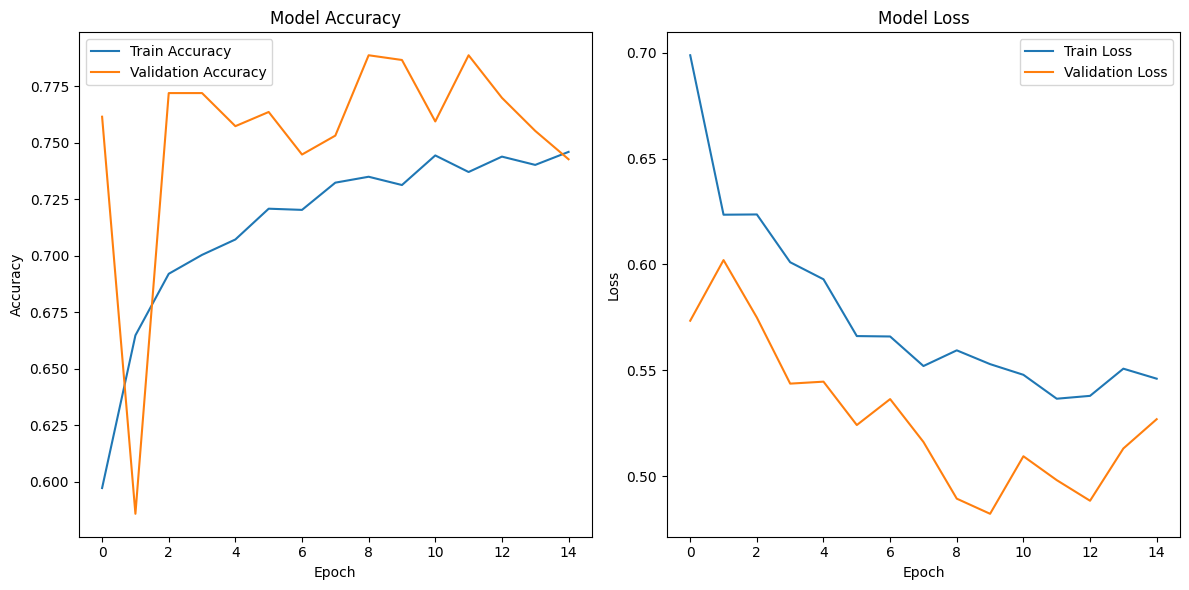

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = resnet_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 204s 797ms/step
Micro-Averaged ROC-AUC Score: 0.7612731026648656


**DenseNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a DenseNet-based model
def create_densenet_model(input_shape, num_classes):
    # Load the DenseNet121 model without the top layer
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers to retain pre-trained features
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Flatten feature maps
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (224, 224, 3)  # Image dimensions (height, width, channels)
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
densenet_model = create_densenet_model(input_shape, num_classes)

# Display the model architecture
densenet_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = densenet_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks like annealer if needed
)

# Save the model in .h5 format after training
densenet_model.save('densenet_model.h5')
print("Model saved as 'densenet_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = densenet_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_7[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,168,962 (27.35 MB)

 Trainable params: 131,458 (513.51 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 457s 914ms/step - accuracy: 0.6663 - loss: 0.7431 - val_accuracy: 0.7803 - val_loss: 0.5518
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 432s 904ms/step - accuracy: 0.7644 - loss: 0.5222 - val_accuracy: 0.7782 - val_loss: 0.4645
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 443s 906ms/step - accuracy: 0.7614 - loss: 0.5095 - val_accuracy: 0.7929 - val_loss: 0.4489
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 437s 896ms/step - accuracy: 0.7711 - loss: 0.5180 - val_accuracy: 0.7741 - val_loss: 0.4701
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 431s 874ms/step - accuracy: 0.7850 - loss: 0.4861 - val_accuracy: 0.7824 - val_loss: 0.4503
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 426s 893ms/step - accuracy: 0.7824 - loss: 0.4701 - val_accuracy: 0.8075 - val_loss: 0.4365
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 426s 891ms/step - accuracy: 0.7772 - loss: 0.4754 - val_accuracy: 0.8033 - val_loss: 0.4428
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 419s 877ms/step - accuracy: 0.8065 -

Model saved as 'densenet_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 184s 719ms/step - accuracy: 0.7958 - loss: 0.4179
Test Accuracy: 81.43%


256/256 ━━━━━━━━━━━━━━━━━━━━ 185s 704ms/step


<Figure size 1000x1000 with 0 Axes>

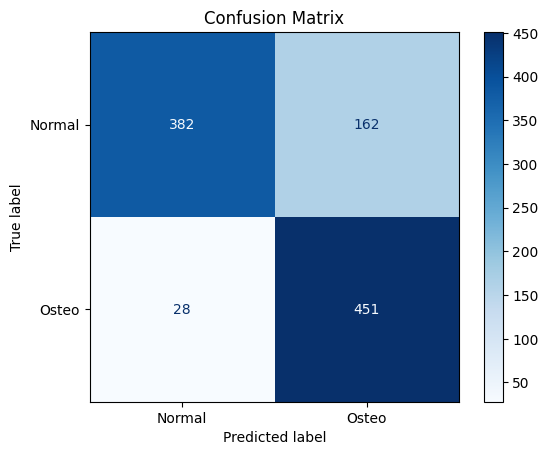

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.70      0.80       544
       Osteo       0.74      0.94      0.83       479

    accuracy                           0.81      1023
   macro avg       0.83      0.82      0.81      1023
weighted avg       0.84      0.81      0.81      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = densenet_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

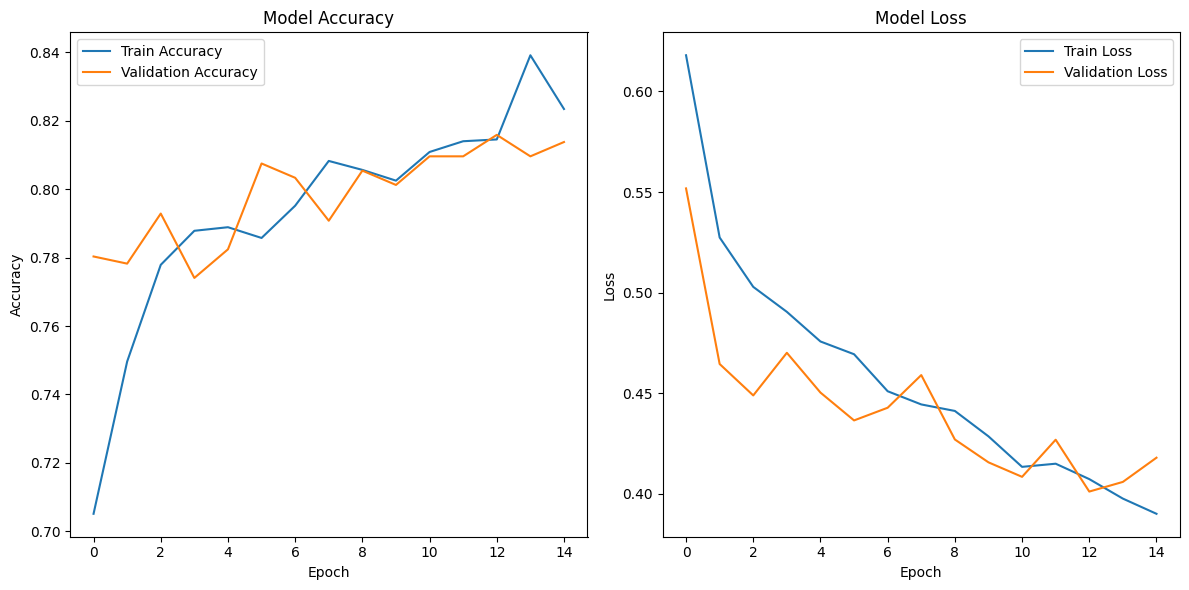

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = densenet_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 177s 693ms/step
Micro-Averaged ROC-AUC Score: 0.8218753837651971


**VGGNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a VGG16-based model
def create_vgg_model(input_shape, num_classes):
    # Load the VGG16 model without the top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers to retain pre-trained features
    base_model.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Flatten feature maps
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (224, 224, 3)  # Image dimensions (height, width, channels)
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
vgg_model = create_vgg_model(input_shape, num_classes)

# Display the model architecture
vgg_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = vgg_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks like annealer if needed
)

# Save the model in .h5 format after training
vgg_model.save('vgg_model.h5')
print("Model saved as 'vgg_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = vgg_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1368s 3s/step - accuracy: 0.6138 - loss: 0.6557 - val_accuracy: 0.6904 - val_loss: 0.5392
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1334s 3s/step - accuracy: 0.7103 - loss: 0.5487 - val_accuracy: 0.7699 - val_loss: 0.5105
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1326s 3s/step - accuracy: 0.7343 - loss: 0.5491 - val_accuracy: 0.7678 - val_loss: 0.4880
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1342s 3s/step - accuracy: 0.7518 - loss: 0.5128 - val_accuracy: 0.7594 - val_loss: 0.4824
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1320s 3s/step - accuracy: 0.7621 - loss: 0.4882 - val_accuracy: 0.7720 - val_loss: 0.4808
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1323s 3s/step - accuracy: 0.7610 - loss: 0.4841 - val_accuracy: 0.7427 - val_loss: 0.4816
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1319s 3s/step - accuracy: 0.7730 - loss: 0.4815 - val_accuracy: 0.7762 - val_loss: 0.4717
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 1327s 3s/step - accuracy: 0.7655 - loss: 0.4852 - 

Model saved as 'vgg_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.7690 - loss: 0.4749
Test Accuracy: 79.77%


256/256 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step


<Figure size 1000x1000 with 0 Axes>

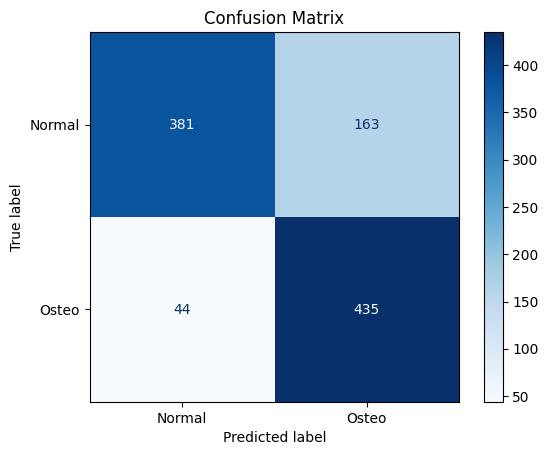

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.70      0.79       544
       Osteo       0.73      0.91      0.81       479

    accuracy                           0.80      1023
   macro avg       0.81      0.80      0.80      1023
weighted avg       0.82      0.80      0.80      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = vgg_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

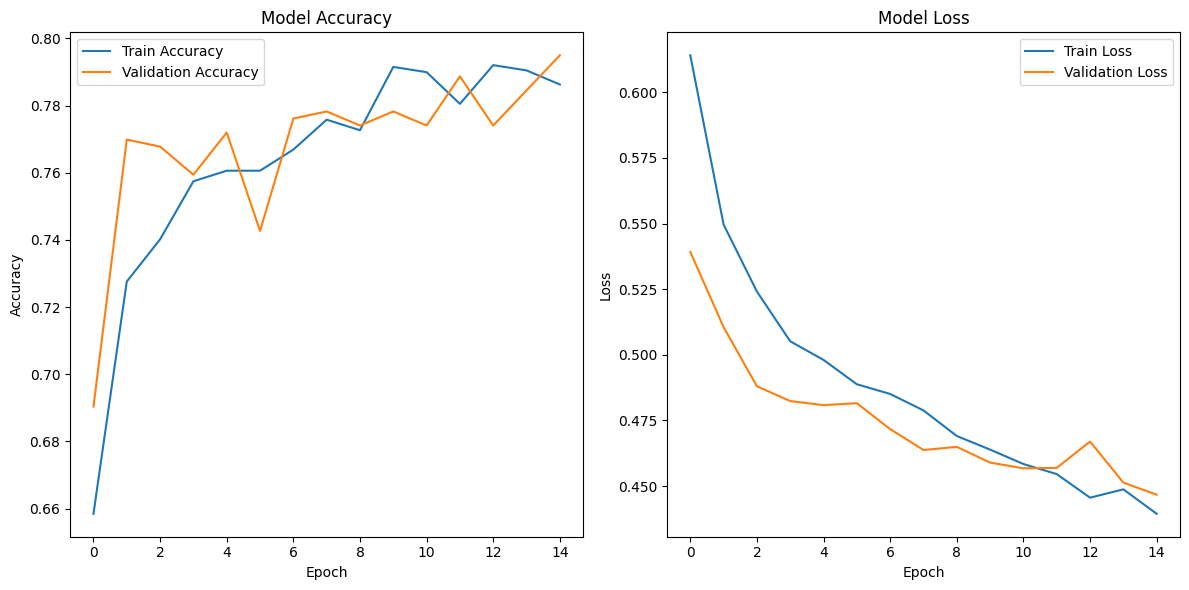

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = vgg_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step
Micro-Averaged ROC-AUC Score: 0.8042548047402678


**InceptionV3 Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the InceptionV3 model pre-trained on ImageNet, excluding the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[early_stopping]  # You can add more callbacks if needed
)

# Save the model in .h5 format after training
model.save('inceptionv3_model.h5')
print("Model saved as 'inceptionv3_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 111, 111, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 390s 795ms/step - accuracy: 0.6504 - loss: 1.5855 - val_accuracy: 0.7720 - val_loss: 0.4861
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 366s 765ms/step - accuracy: 0.7701 - loss: 0.5186 - val_accuracy: 0.7782 - val_loss: 0.4710
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 365s 763ms/step - accuracy: 0.7338 - loss: 0.5157 - val_accuracy: 0.7824 - val_loss: 0.4573
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 370s 774ms/step - accuracy: 0.7668 - loss: 0.4919 - val_accuracy: 0.7971 - val_loss: 0.4797
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 365s 765ms/step - accuracy: 0.7718 - loss: 0.4764 - val_accuracy: 0.7971 - val_loss: 0.4597
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 365s 763ms/step - accuracy: 0.7819 - loss: 0.4798 - val_accuracy: 0.8054 - val_loss: 0.4393
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 387s 775ms/step - accuracy: 0.8086 - loss: 0.4140 - val_accuracy: 0.7741 - val_loss: 0.4511
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 367s 769ms/step - accuracy: 0.7788 -

Model saved as 'inceptionv3_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 160s 623ms/step - accuracy: 0.8076 - loss: 0.4548
Test Accuracy: 80.55%


256/256 ━━━━━━━━━━━━━━━━━━━━ 153s 589ms/step


<Figure size 1000x1000 with 0 Axes>

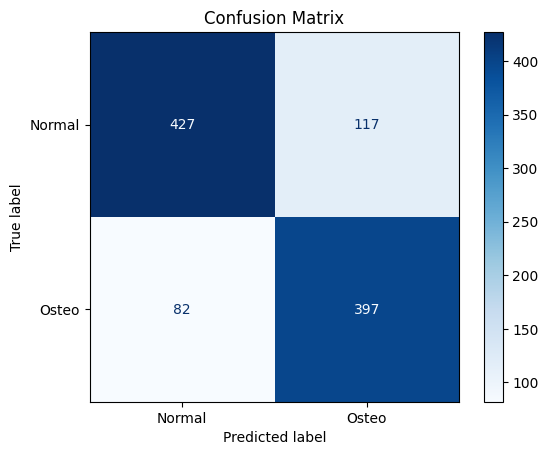

Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.78      0.81       544
       Osteo       0.77      0.83      0.80       479

    accuracy                           0.81      1023
   macro avg       0.81      0.81      0.81      1023
weighted avg       0.81      0.81      0.81      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
inceptionv3_model = load_model('inceptionv3_model.h5')

# Recompile the model to ensure metrics are available
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # Extract true labels directly from the DataFrameIterator

# Predict the probabilities for each class
pred_probabilities = inceptionv3_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

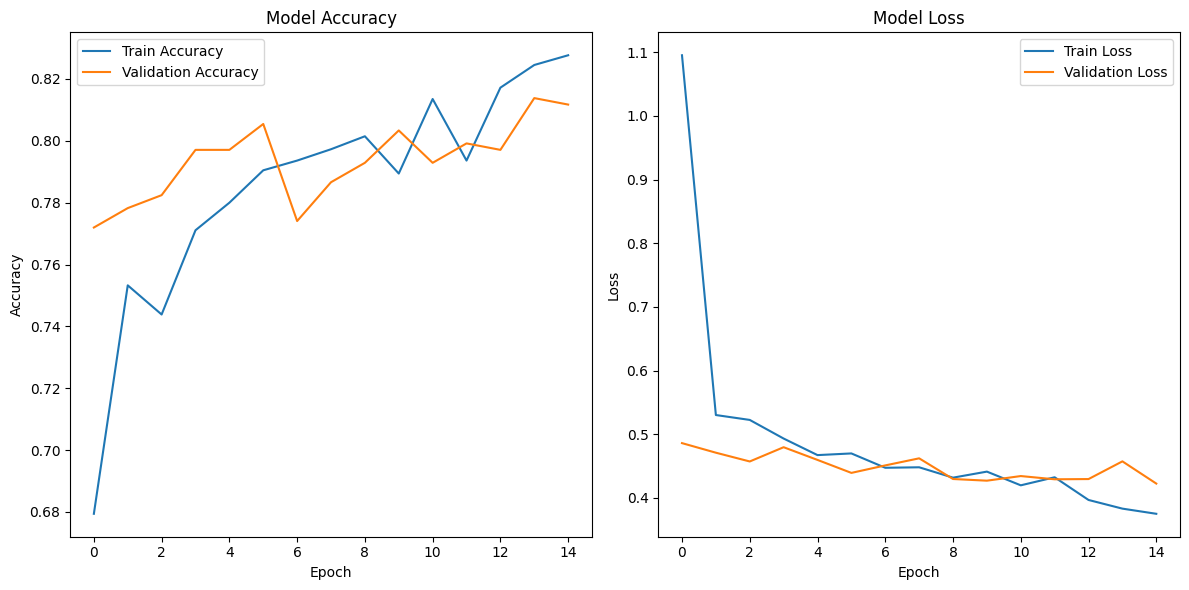

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = inceptionv3_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 149s 583ms/step
Micro-Averaged ROC-AUC Score: 0.806868245732531


**Xception Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Xception model pre-trained on ImageNet, excluding the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train,
    epochs=15,
    validation_data=val,
    callbacks=[early_stopping]
)

# Save the trained model
model.save('xception_model.h5')
print("Model saved as 'xception_model.h5'")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 22,961,706 (87.59 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 589s 1s/step - accuracy: 0.6478 - loss: 0.8493 - val_accuracy: 0.7510 - val_loss: 0.5225
Epoch 2/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.7489 - loss: 0.5196 - val_accuracy: 0.7678 - val_loss: 0.5145
Epoch 3/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 602s 1s/step - accuracy: 0.7495 - loss: 0.5141 - val_accuracy: 0.7762 - val_loss: 0.4789
Epoch 4/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.7933 - loss: 0.4426 - val_accuracy: 0.7699 - val_loss: 0.4980
Epoch 5/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 602s 1s/step - accuracy: 0.7934 - loss: 0.4366 - val_accuracy: 0.7845 - val_loss: 0.4670
Epoch 6/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 606s 1s/step - accuracy: 0.7954 - loss: 0.4333 - val_accuracy: 0.7782 - val_loss: 0.5236
Epoch 7/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 608s 1s/step - accuracy: 0.8095 - loss: 0.4156 - val_accuracy: 0.7301 - val_loss: 0.6033
Epoch 8/15
478/478 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.8155 - loss: 0.3988 - val_accu

Model saved as 'xception_model.h5'
256/256 ━━━━━━━━━━━━━━━━━━━━ 242s 943ms/step - accuracy: 0.7953 - loss: 0.4849
Test Accuracy: 80.55%


256/256 ━━━━━━━━━━━━━━━━━━━━ 246s 952ms/step


<Figure size 1000x1000 with 0 Axes>

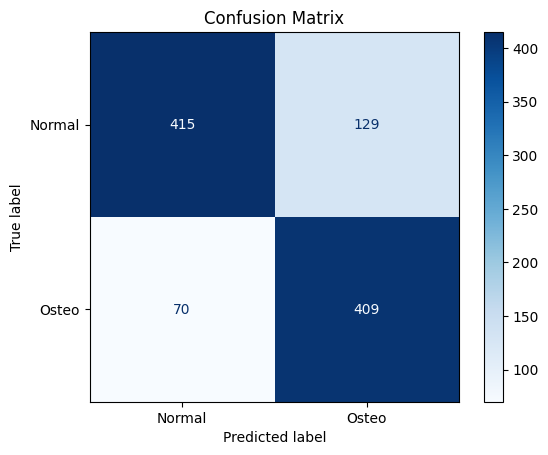

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.76      0.81       544
       Osteo       0.76      0.85      0.80       479

    accuracy                           0.81      1023
   macro avg       0.81      0.81      0.81      1023
weighted avg       0.81      0.81      0.81      1023



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained Xception model
xception_model = load_model('xception_model.h5')

# Recompile the model to ensure metrics are available
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # Extract true labels directly from the DataFrameIterator

# Predict the probabilities for each class
pred_probabilities = xception_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 4: Generate the classification report
class_names = list(test.class_indices.keys())  # Class names from the test set
report = classification_report(true_labels, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

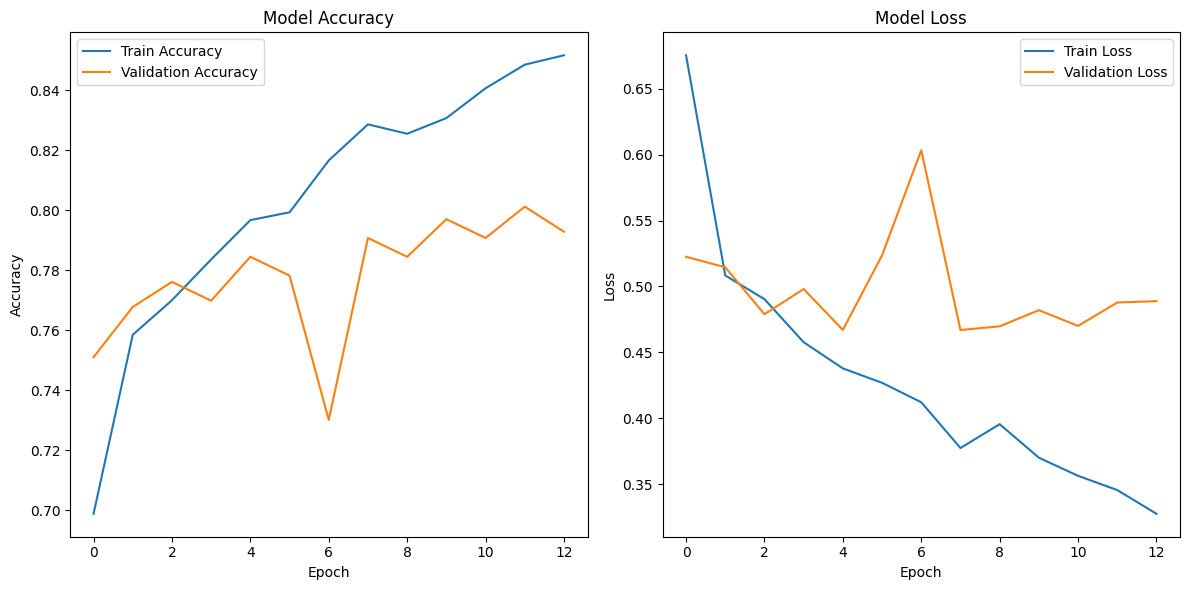

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = xception_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 239s 933ms/step
Micro-Averaged ROC-AUC Score: 0.8083649300012281


**Comparison of all Models**

256/256 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 204s 786ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 188s 717ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 639s 2s/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 158s 597ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 250s 971ms/step


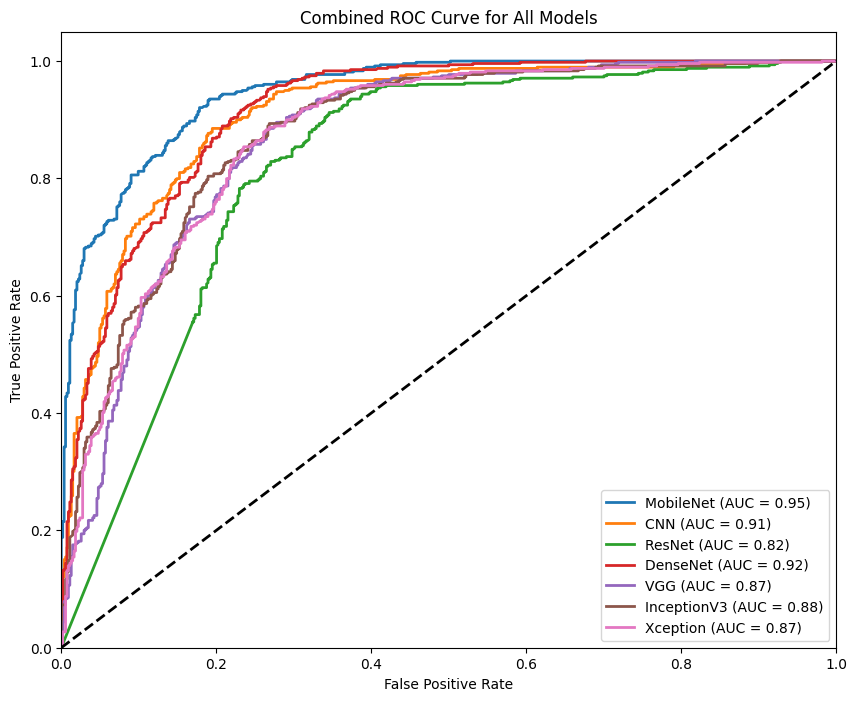

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load models if not already defined
models = {
    "MobileNet": load_model("/content/drive/MyDrive/Os/mobilenet_model.h5"),
    "CNN": load_model("/content/drive/MyDrive/Os/cnn_model.h5"),
    "ResNet": load_model("/content/drive/MyDrive/Os/resnet_model.h5"),
    "DenseNet": load_model("/content/drive/MyDrive/Os/densenet_model.h5"),
    "VGG": load_model("/content/drive/MyDrive/Os/vgg_model.h5"),
    "InceptionV3": load_model("/content/drive/MyDrive/Os/inceptionv3_model.h5"),
    "Xception": load_model("/content/drive/MyDrive/Os/xception_model.h5")
}

# Define the number of classes
num_classes = len(test.class_indices)  # Ensure test dataset is properly defined

# Binarize the true labels for ROC AUC calculation
y_true = test.classes  # True labels as integers
y_true_binarized = label_binarize(y_true, classes=list(range(num_classes)))

# Get predicted probabilities from each model and select the positive class probability
roc_curves = {}
for model_name, model in models.items():
    y_pred_proba = model.predict(test)[:, 1]  # Assuming binary classification
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves[model_name] = (fpr, tpr, roc_auc)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()

256/256 ━━━━━━━━━━━━━━━━━━━━ 53s 206ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 43s 166ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 201s 785ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 184s 720ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 641s 3s/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 151s 588ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 251s 979ms/step
Accuracies:
MobileNet: 0.87
CNN: 0.83
ResNet: 0.77
DenseNet: 0.83
VGG: 0.80
InceptionV3: 0.81
Xception: 0.81


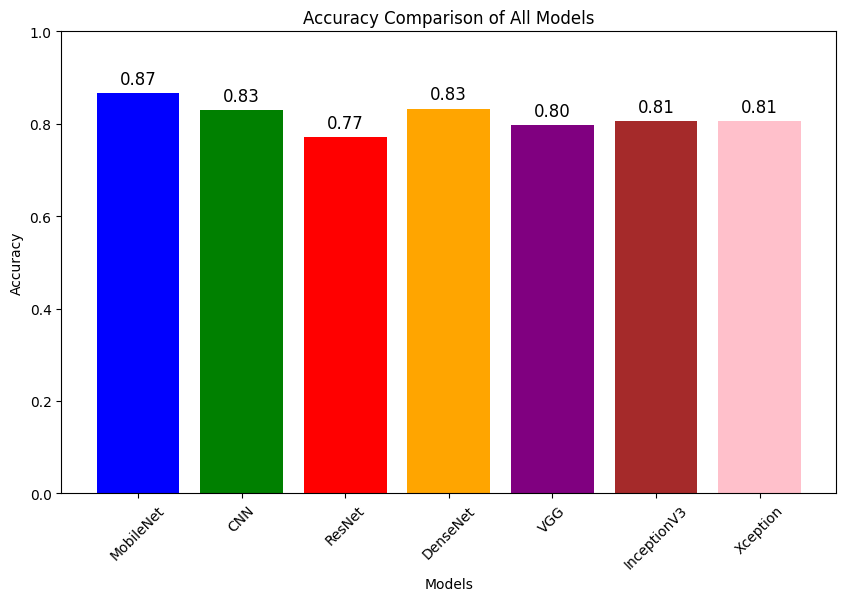

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the number of classes
num_classes = len(test.class_indices)  # Ensure test dataset is properly defined

# Get predicted probabilities and predictions from each model
model_accuracies = {}
for model_name, model in models.items():
    y_pred_proba = model.predict(test)  # Get predicted probabilities
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convert to class labels
    accuracy = accuracy_score(test.classes, y_pred)  # Calculate accuracy
    model_accuracies[model_name] = accuracy

# Print accuracies
print("Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink'])
plt.ylim([0, 1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models')

# Display accuracy values on the bars
for i, (model_name, acc) in enumerate(model_accuracies.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

256/256 ━━━━━━━━━━━━━━━━━━━━ 56s 217ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 45s 177ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 202s 790ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 184s 720ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 646s 3s/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 151s 589ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 246s 959ms/step


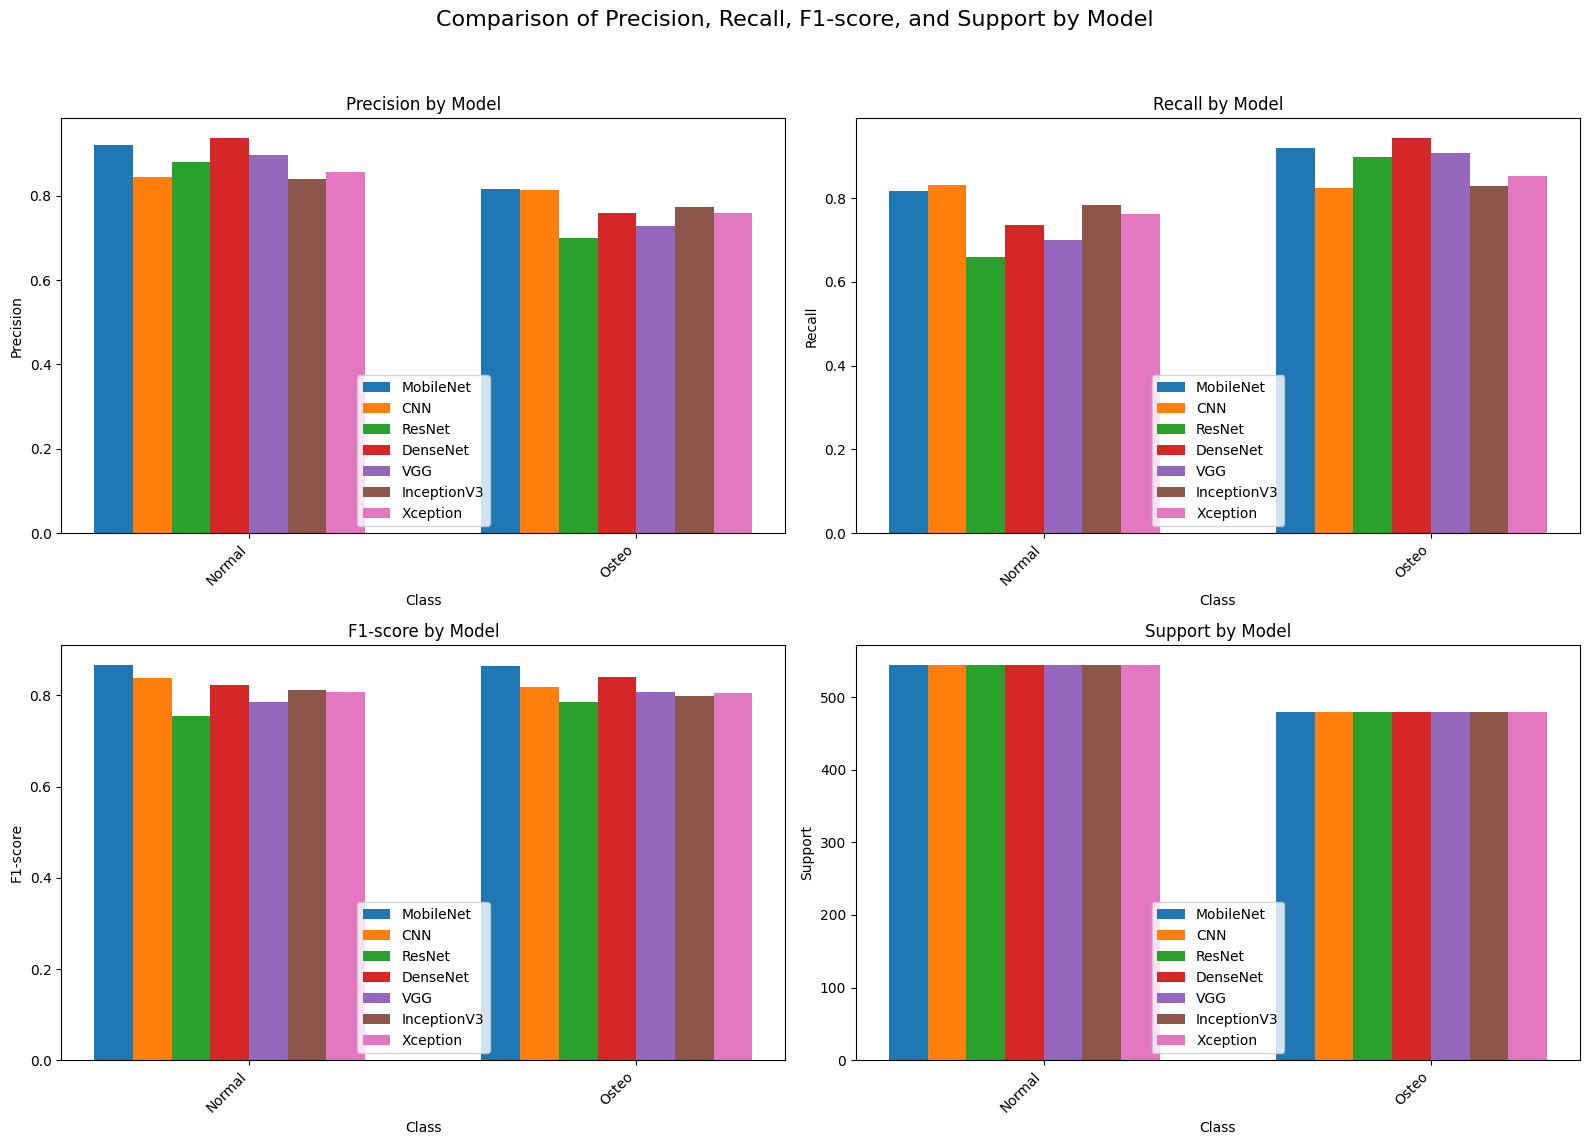

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Define the number of classes
num_classes = len(test.class_indices)  # Ensure test dataset is properly defined
class_names = list(test.class_indices.keys())

# Dictionary to store classification reports
classification_reports = {}

# Compute classification reports for all models
for model_name, model in models.items():
    y_pred_proba = model.predict(test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    classification_reports[model_name] = classification_report(test.classes, y_pred, output_dict=True)

# Define metrics to plot
metrics = ['precision', 'recall', 'f1-score', 'support']

# Create subplots for precision, recall, F1-score, and support
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison of Precision, Recall, F1-score, and Support by Model', fontsize=16)

# Iterate over the 4 metrics and plot them
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    bar_width = 0.1  # Adjust width for 8 models
    bar_positions = np.arange(len(class_names))

    for j, (model_name, report) in enumerate(classification_reports.items()):
        # Extract values for only the actual classes (ignore 'accuracy', 'macro avg', 'weighted avg')
        metric_values = [report[str(k)][metric] for k in range(num_classes) if str(k) in report]
        ax.bar(bar_positions + j * bar_width, metric_values, width=bar_width, label=model_name)

    # Configure the plot
    ax.set_xticks(bar_positions + bar_width * (len(models) / 2))  # Centering the labels
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_xlabel('Class')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'{metric.capitalize()} by Model')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()